# Experiments Theory of Mind in teacher-learner gridworld setup

In [1]:
from __future__ import annotations
import warnings

from minigrid.core.actions import Actions
from minigrid.core.constants import IDX_TO_COLOR, DIR_TO_VEC

import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from environment import MultiGoalsEnv
from learner import BayesianLearner

warnings.filterwarnings("ignore", category=RuntimeWarning)

pygame 2.4.0 (SDL 2.26.4, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Parameters

GRID_SIZE = 15
num_doors = 4
rf_values = [3, 5, 7, 15]

## Environment

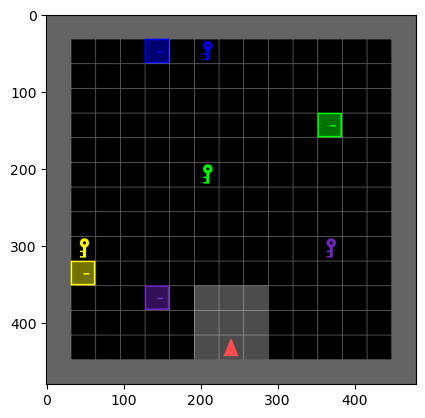

In [3]:
env = MultiGoalsEnv(render_mode = "rgb_array",
                    agent_goal=0, agent_view_size=3, 
                    agent_start_pos=(GRID_SIZE//2, GRID_SIZE-2), agent_start_dir=3,
                    size=GRID_SIZE)
_ = env.reset()

plt.imshow(env.render());

## Learner (Bayesian - RL)

In [5]:
receptive_field = 3
goal = 0

learner = BayesianLearner(goal=goal, receptive_field=receptive_field, grid_size=GRID_SIZE, save_render=True)
learner.play()

print(f' Learner with rf={receptive_field} for goal={goal} ({IDX_TO_COLOR[goal+1]}) \n \
      Step count: {learner.env.step_count} \n \
      Reward: {learner.reward:.4f}')

 Learner with rf=3 for goal=0 (green) 
       Step count: 39 
       Reward: 0.6490


### Examples behaviours

In [18]:
from IPython.display import display, HTML

for rf in [3, 5, 7]:
    for goal in [1, 2, 3, 4]:
        gif_path = f"./outputs_rendering/example/output_rf_{rf}_goal_{goal}.gif"
        gif_beliefs_path = f"./outputs_rendering/example/output_belief_rf_{rf}_goal_{goal}.gif"
        title = f"Receptive field {rf}, goal {IDX_TO_COLOR[goal]}"

        html_code = f'''
        <div style="display: flex; justify-content;">
            <div>
                <h2>{title}</h2>
            </div>
        </div>
        <div style="display: flex; justify-content;">
            <div>
                <img src="{gif_path}" alt="GIF 1" width="300" height="300">
            </div>
            <div>
                <img src="{gif_beliefs_path}" alt="GIF 2" width="300" height="300">
            </div>
        </div>
        '''

        display(HTML(html_code))

### Statistics on different learners

In [8]:
# Paremeters

N = 500

In [ ]:
mean_reward_all = np.zeros((num_doors, len(rf_values)))
std_reward_all = np.zeros((num_doors, len(rf_values)))

mean_count_all = np.zeros((num_doors, len(rf_values)))
std_count_all = np.zeros((num_doors, len(rf_values)))

for goal in range(num_doors):
    for ii,rf in enumerate(rf_values):
        rewards_all = []
        counts_all = []
        for _ in trange(N):
            learner = BayesianLearner(goal=goal, receptive_field=rf, grid_size=GRID_SIZE, max_steps=200)#, save_render=True)
            learner.play()
            
            if learner.reward == 0:
                assert(False)
            # Stats
            rewards_all.append(learner.reward)
            counts_all.append(learner.env.step_count)

        mean_reward_all[goal, ii] = np.mean(rewards_all)
        std_reward_all[goal, ii] = 1.96 * np.std(rewards_all) / np.sqrt(N)

        mean_count_all[goal, ii] = np.mean(counts_all)
        std_count_all[goal, ii] = 1.96 * np.std(counts_all) / np.sqrt(N)

In [7]:
import pandas as pd

mean_std_reward = np.zeros((num_doors, len(rf_values))).astype(str)

for goal in range(num_doors):
    for ii,rf in enumerate(rf_values):
        mean_std_reward[goal, ii] = str(np.round(mean_reward_all[goal, ii], 4)) + " +/- " + str(np.round(std_reward_all[goal, ii], 4))

df_reward = pd.DataFrame(mean_std_reward, columns=np.array(rf_values).astype('str'), index=['Green', 'Blue', 'Purple', 'Yellow'])

mean_std_count = np.zeros((num_doors, len(rf_values))).astype(str)

for goal in range(num_doors):
    for ii,rf in enumerate(rf_values):
        mean_std_count[goal, ii] = str(np.round(mean_count_all[goal, ii], 4)) + " +/- " + str(np.round(std_count_all[goal, ii], 4))

df_count = pd.DataFrame(mean_std_count, columns=np.array(rf_values).astype('str'), index=['Green', 'Blue', 'Purple', 'Yellow'])

In [8]:
print("Reward per type of learner")
display(df_reward)
print("# of step to fininsh the task per type of learner")
display(df_count)

Reward per type of learner


,3,5,7,15
Green,0.7193 +/- 0.011,0.8176 +/- 0.0074,0.8619 +/- 0.0046,0.8955 +/- 0.0027
Blue,0.7172 +/- 0.011,0.8196 +/- 0.0073,0.8553 +/- 0.0048,0.8951 +/- 0.0028
Purple,0.7127 +/- 0.0114,0.8166 +/- 0.007,0.8546 +/- 0.0048,0.8961 +/- 0.0025
Yellow,0.7201 +/- 0.0114,0.8183 +/- 0.0074,0.8586 +/- 0.0047,0.8969 +/- 0.0027


# of step to fininsh the task per type of learner


,3,5,7,15
Green,62.37 +/- 2.4462,40.542 +/- 1.6367,30.678 +/- 1.0299,23.222 +/- 0.5911
Blue,62.852 +/- 2.4524,40.098 +/- 1.617,32.15 +/- 1.0579,23.322 +/- 0.626
Purple,63.85 +/- 2.5248,40.762 +/- 1.5477,32.318 +/- 1.0687,23.078 +/- 0.5633
Yellow,62.206 +/- 2.5342,40.384 +/- 1.6419,31.418 +/- 1.0495,22.914 +/- 0.6101


In [22]:
import pandas as pd

mean_std_reward = np.zeros(len(rf_values)).astype(str)

for ii,rf in enumerate(rf_values):
    mean_std_reward[ii] = str(np.round(np.mean(mean_reward_all[:, ii]), 4)) + " +/- " + str(np.round(np.mean(std_reward_all[:, ii]), 4))

df_reward = pd.DataFrame(mean_std_reward.reshape((1,4)), columns=np.array(rf_values).astype('str'), index=['learner'])

mean_std_count = np.zeros(len(rf_values)).astype(str)

for ii,rf in enumerate(rf_values):
    mean_std_count[ii] = str(np.round(np.mean(mean_count_all[:, ii]), 4)) + " +/- " + str(np.round(np.mean(std_count_all[:, ii]), 4))

df_count = pd.DataFrame(mean_std_count.reshape((1,4)), columns=np.array(rf_values).astype('str'), index=['learner'])

In [23]:
print("Reward per RF")
display(df_reward)
print("# of step to fininsh the task per RF")
display(df_count)

Reward per RF


,3,5,7,15
learner,0.7173 +/- 0.0112,0.818 +/- 0.0072,0.8576 +/- 0.0047,0.8959 +/- 0.0027


# of step to fininsh the task per RF


,3,5,7,15
learner,62.8195 +/- 2.4894,40.4465 +/- 1.6108,31.641 +/- 1.0515,23.134 +/- 0.5976
